In [32]:

from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
from keras.initializers import he_uniform

from keras.models import Sequential 
from keras.layers import Dense, Activation 

from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [4]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [6]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [7]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [8]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [9]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [10]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [11]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [16]:
output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

# 1. 2 layer architecture 

In [26]:
model_2_layer= Sequential()
model_2_layer.add(Dense(392, activation='relu', input_shape=(input_dim,), kernel_initializer=he_uniform(seed=None)))
model_2_layer.add(Dense(196, activation='relu', kernel_initializer=he_uniform(seed=None)) )
model_2_layer.add(Dense(output_dim, activation='softmax'))

print(model_2_layer.summary())

model_2_layer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_2_layer.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 392)               307720    
_________________________________________________________________
dense_11 (Dense)             (None, 196)               77028     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1970      
Total params: 386,718
Trainable params: 386,718
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.2367 - acc: 0.9302 - val_loss: 0.1180 - val_acc: 0.9641
Epoch 2/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.0872 - acc: 0.9730 - val_loss: 0.0820 - val_acc: 0.9752
Epoch 3/20
60000/60000 [==============================] - 9s 146us/s

Test score: 0.09090641767870489
Test accuracy: 0.9819


<IPython.core.display.Javascript object>


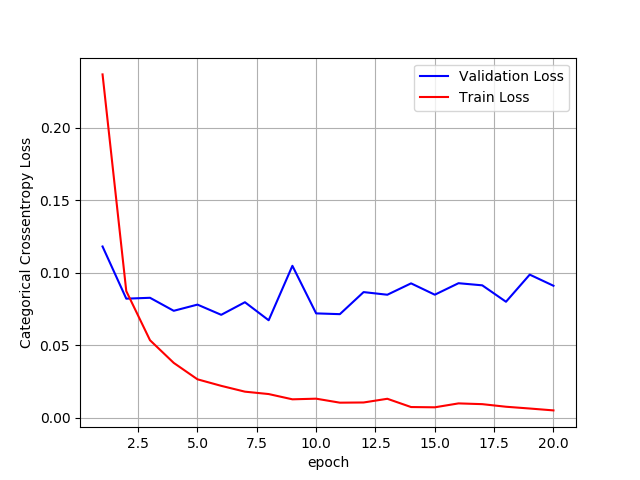

In [27]:
score = model_2_layer.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


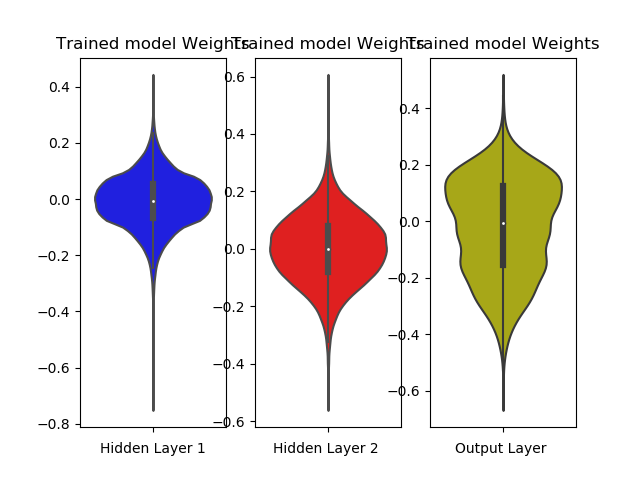

C:\Users\JAYESH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [28]:
w_after = model_2_layer.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 2 layer architecture with BN and dropout

In [36]:
model_2_layer_bn_drp = Sequential()
model_2_layer_bn_drp.add(Dense(392, activation='relu', input_shape=(input_dim,), kernel_initializer=he_uniform(seed=None)))
model_2_layer_bn_drp.add(BatchNormalization())
model_2_layer_bn_drp.add(Dropout(0.2))

model_2_layer_bn_drp.add(Dense(196, activation='relu', kernel_initializer=he_uniform(seed=None)) )
model_2_layer_bn_drp.add(BatchNormalization())
model_2_layer_bn_drp.add(Dropout(0.2))

model_2_layer_bn_drp.add(Dense(output_dim, activation='softmax'))

print(model_2_layer_bn_drp.summary())

model_2_layer_bn_drp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_2_layer_bn_drp.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 392)               307720    
_________________________________________________________________
batch_normalization_4 (Batch (None, 392)               1568      
_________________________________________________________________
dropout_3 (Dropout)          (None, 392)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 196)               77028     
_________________________________________________________________
batch_normalization_5 (Batch (None, 196)               784       
_________________________________________________________________
dropout_4 (Dropout)          (None, 196)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1970      
Total para

Test score: 0.05793501056696841
Test accuracy: 0.9831


<IPython.core.display.Javascript object>


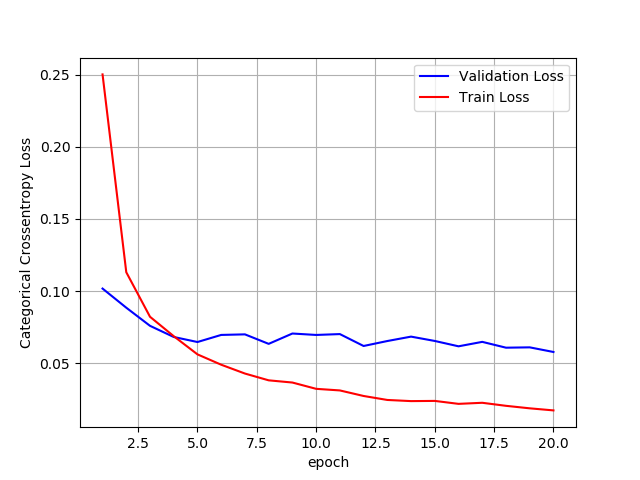

In [37]:
score = model_2_layer_bn_drp.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


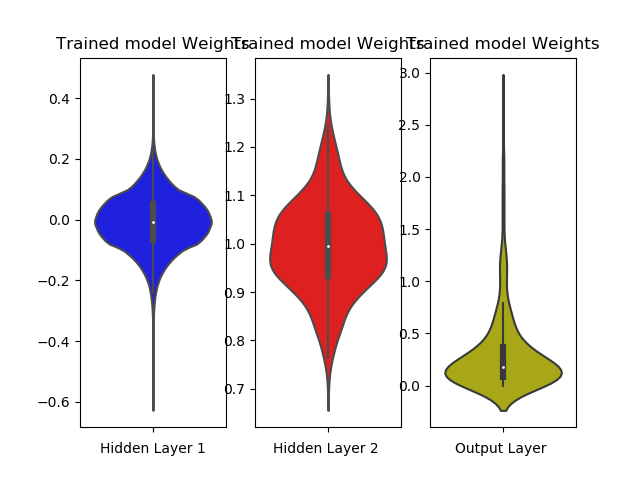

C:\Users\JAYESH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [38]:
w_after = model_2_layer_bn_drp.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 3 layer architecture 

In [40]:
model_3_layer= Sequential()
model_3_layer.add(Dense(392, activation='relu', input_shape=(input_dim,), kernel_initializer=he_uniform(seed=None)))
model_3_layer.add(Dense(196, activation='relu', kernel_initializer=he_uniform(seed=None)) )
model_3_layer.add(Dense(98, activation='relu', kernel_initializer=he_uniform(seed=None)) )
model_3_layer.add(Dense(output_dim, activation='softmax'))

print(model_3_layer.summary())

model_3_layer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_3_layer.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 392)               307720    
_________________________________________________________________
dense_26 (Dense)             (None, 196)               77028     
_________________________________________________________________
dense_27 (Dense)             (None, 98)                19306     
_________________________________________________________________
dense_28 (Dense)             (None, 10)                990       
Total params: 405,044
Trainable params: 405,044
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 184us/step - loss: 0.2335 - acc: 0.9313 - val_loss: 0.1033 - val_acc: 0.9678
Epoch 2/20
60000/60000 [==============================] - 10s 175us/step -

Test score: 0.09553646319991535
Test accuracy: 0.9826


<IPython.core.display.Javascript object>


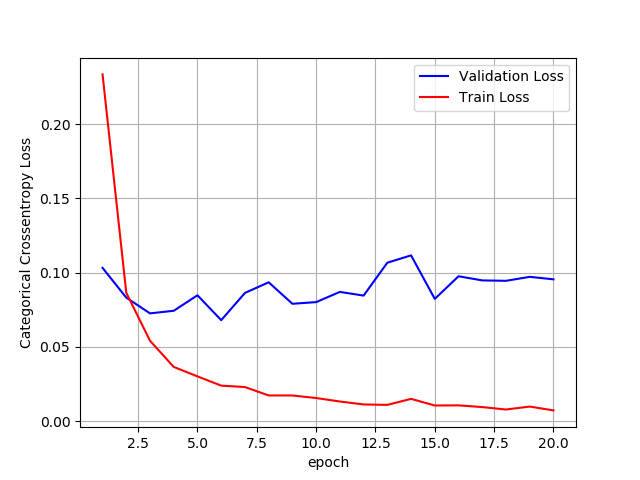

In [41]:
score = model_3_layer.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


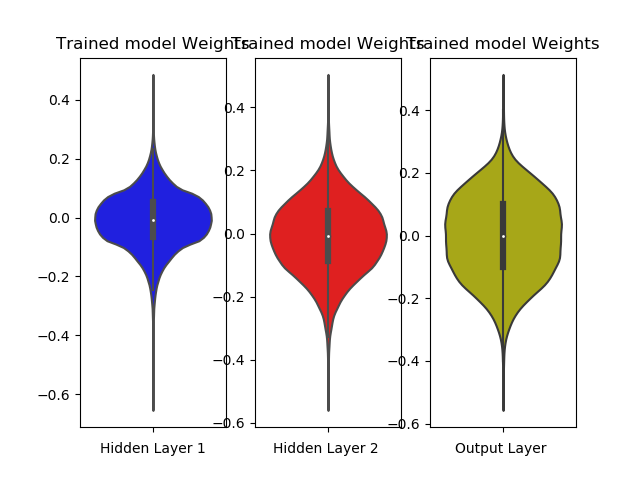

C:\Users\JAYESH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [42]:
w_after = model_3_layer.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 3 layer architecture with BN and dropout

In [43]:
model_3_layer_bn_dp= Sequential()
model_3_layer_bn_dp.add(Dense(392, activation='relu', input_shape=(input_dim,), kernel_initializer=he_uniform(seed=None)))
model_3_layer_bn_dp.add(BatchNormalization())
model_3_layer_bn_dp.add(Dropout(0.2))

model_3_layer_bn_dp.add(Dense(196, activation='relu', kernel_initializer=he_uniform(seed=None)) )
model_3_layer_bn_dp.add(BatchNormalization())
model_3_layer_bn_dp.add(Dropout(0.2))

model_3_layer_bn_dp.add(Dense(98, activation='relu', kernel_initializer=he_uniform(seed=None)) )
model_3_layer_bn_dp.add(BatchNormalization())
model_3_layer_bn_dp.add(Dropout(0.2))

model_3_layer_bn_dp.add(Dense(output_dim, activation='softmax'))

print(model_3_layer_bn_dp.summary())

model_3_layer_bn_dp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_3_layer_bn_dp.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 392)               307720    
_________________________________________________________________
batch_normalization_6 (Batch (None, 392)               1568      
_________________________________________________________________
dropout_5 (Dropout)          (None, 392)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 196)               77028     
_________________________________________________________________
batch_normalization_7 (Batch (None, 196)               784       
_________________________________________________________________
dropout_6 (Dropout)          (None, 196)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 98)                19306     
__________

Test score: 0.0628011962870427
Test accuracy: 0.9825


<IPython.core.display.Javascript object>


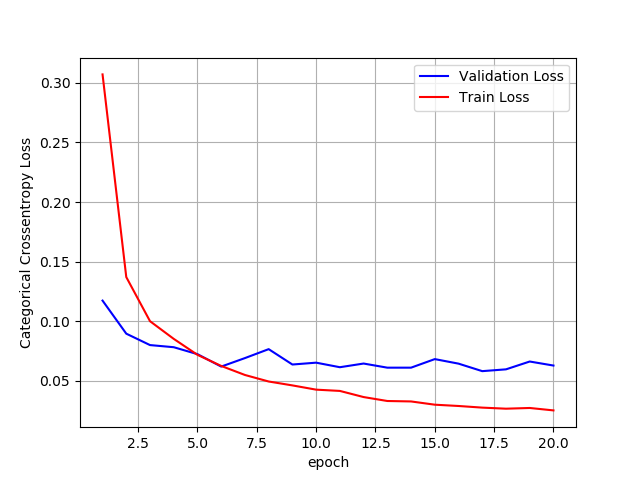

In [44]:
score = model_3_layer_bn_dp.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


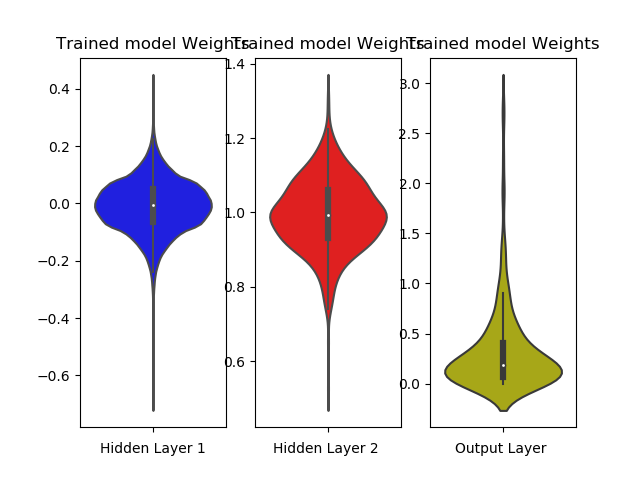

C:\Users\JAYESH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [45]:
w_after = model_3_layer_bn_dp.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 5 layer architecture

In [46]:
model_5_layer= Sequential()
model_5_layer.add(Dense(392, activation='relu', input_shape=(input_dim,), kernel_initializer=he_uniform(seed=None)))
model_5_layer.add(Dense(196, activation='relu', kernel_initializer=he_uniform(seed=None)) )
model_5_layer.add(Dense(98, activation='relu', kernel_initializer=he_uniform(seed=None)) )
model_5_layer.add(Dense(49, activation='relu', kernel_initializer=he_uniform(seed=None)) )
model_5_layer.add(Dense(24, activation='relu', kernel_initializer=he_uniform(seed=None)) )
model_5_layer.add(Dense(output_dim, activation='softmax'))

print(model_5_layer.summary())

model_5_layer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_5_layer.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 392)               307720    
_________________________________________________________________
dense_34 (Dense)             (None, 196)               77028     
_________________________________________________________________
dense_35 (Dense)             (None, 98)                19306     
_________________________________________________________________
dense_36 (Dense)             (None, 49)                4851      
_________________________________________________________________
dense_37 (Dense)             (None, 24)                1200      
_________________________________________________________________
dense_38 (Dense)             (None, 10)                250       
Total params: 410,355
Trainable params: 410,355
Non-trainable params: 0
_________________________________________________________________
None

Test score: 0.09267251560331187
Test accuracy: 0.9816


<IPython.core.display.Javascript object>


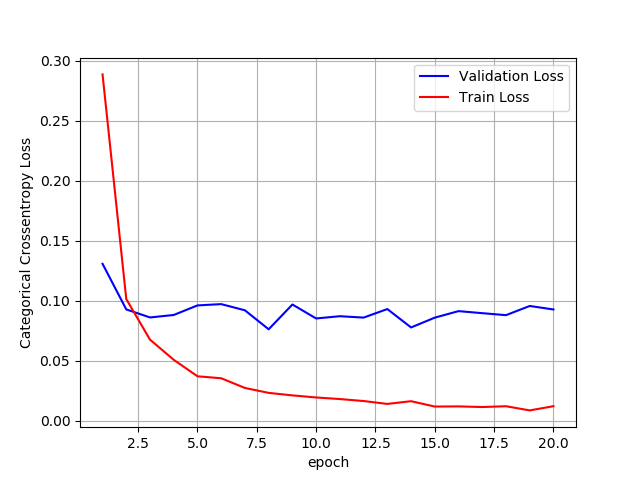

In [47]:
score = model_5_layer.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


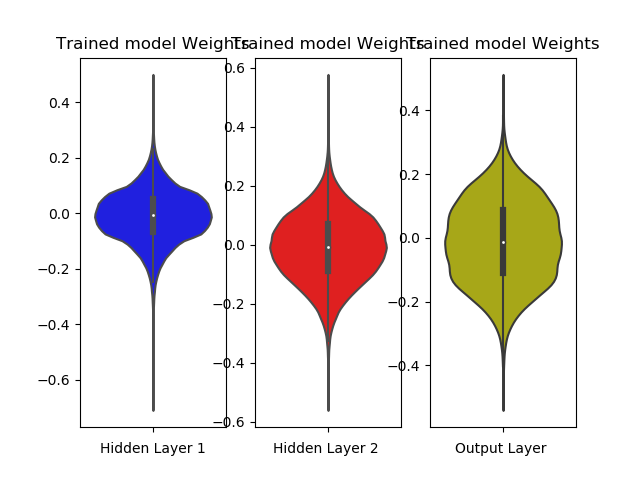

C:\Users\JAYESH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [48]:
w_after = model_5_layer.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 5 layer with BN and dropout

In [49]:
model_5_layer_bn_dp= Sequential()
model_5_layer_bn_dp.add(Dense(392, activation='relu', input_shape=(input_dim,), kernel_initializer=he_uniform(seed=None)))
model_3_layer_bn_dp.add(BatchNormalization())
model_3_layer_bn_dp.add(Dropout(0.2))

model_5_layer_bn_dp.add(Dense(196, activation='relu', kernel_initializer=he_uniform(seed=None)) )
model_3_layer_bn_dp.add(BatchNormalization())
model_3_layer_bn_dp.add(Dropout(0.2))

model_5_layer_bn_dp.add(Dense(98, activation='relu', kernel_initializer=he_uniform(seed=None)) )
model_3_layer_bn_dp.add(BatchNormalization())
model_3_layer_bn_dp.add(Dropout(0.2))

model_5_layer_bn_dp.add(Dense(49, activation='relu', kernel_initializer=he_uniform(seed=None)) )
model_3_layer_bn_dp.add(BatchNormalization())
model_3_layer_bn_dp.add(Dropout(0.2))

model_5_layer_bn_dp.add(Dense(24, activation='relu', kernel_initializer=he_uniform(seed=None)) )
model_3_layer_bn_dp.add(BatchNormalization())
model_3_layer_bn_dp.add(Dropout(0.2))

model_5_layer_bn_dp.add(Dense(output_dim, activation='softmax'))

print(model_5_layer_bn_dp.summary())

model_5_layer_bn_dp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_5_layer_bn_dp.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 392)               307720    
_________________________________________________________________
dense_40 (Dense)             (None, 196)               77028     
_________________________________________________________________
dense_41 (Dense)             (None, 98)                19306     
_________________________________________________________________
dense_42 (Dense)             (None, 49)                4851      
_________________________________________________________________
dense_43 (Dense)             (None, 24)                1200      
_________________________________________________________________
dense_44 (Dense)             (None, 10)                250       
Total params: 410,355
Trainable params: 410,355
Non-trainable params: 0
_________________________________________________________________
None

Test score: 0.11859171255297252
Test accuracy: 0.9773


<IPython.core.display.Javascript object>


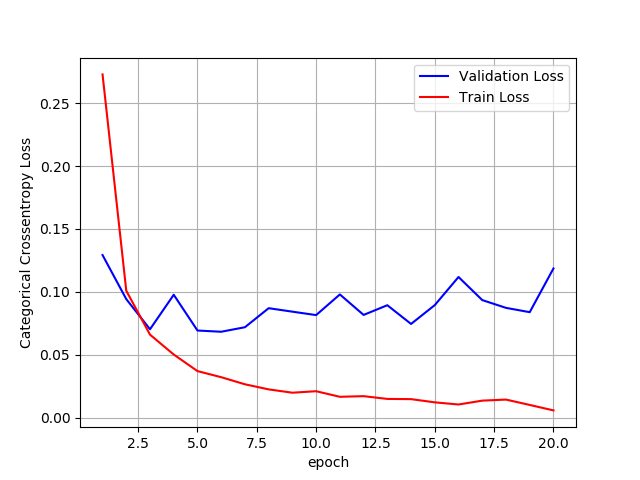

In [50]:
score = model_5_layer_bn_dp.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


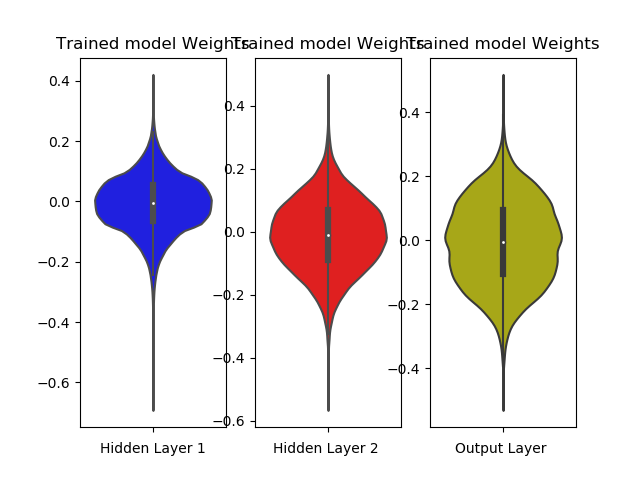

C:\Users\JAYESH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [51]:
w_after = model_5_layer_bn_dp.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()